## D. Kinney DSC 550 Final Project Part 1: 

### Graph Analysis
*****************************

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from plotnine import *

%matplotlib inline

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

#### Step 1: Load data into dataframe

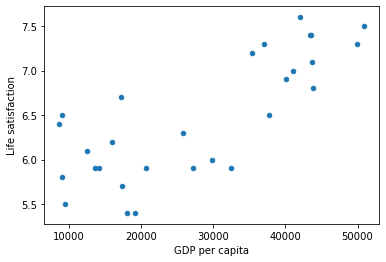

[[6.25984414]]


In [5]:
# Load the data
oecd_bli = pd.read_csv("data/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

#### Step 2:  check the dimension of the table

In [6]:
print("The dimension of the table is: ", oecd_bli.shape)

The dimension of the table is:  (2368, 17)


#### Step 3:  Look at the data

In [7]:
print(oecd_bli.head(5))

  LOCATION         Country INDICATOR                 Indicator MEASURE  \
0      AUS       Australia   JE_LMIS  Labour market insecurity       L   
1      AUT         Austria   JE_LMIS  Labour market insecurity       L   
2      BEL         Belgium   JE_LMIS  Labour market insecurity       L   
3      CAN          Canada   JE_LMIS  Labour market insecurity       L   
4      CZE  Czech Republic   JE_LMIS  Labour market insecurity       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   
3   Value        TOT      Total        PC  Percentage               0   
4   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units                    NaN 

In [8]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 17 columns):
LOCATION                 2368 non-null object
Country                  2368 non-null object
INDICATOR                2368 non-null object
Indicator                2368 non-null object
MEASURE                  2368 non-null object
Measure                  2368 non-null object
INEQUALITY               2368 non-null object
Inequality               2368 non-null object
Unit Code                2368 non-null object
Unit                     2368 non-null object
PowerCode Code           2368 non-null int64
PowerCode                2368 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    2368 non-null float64
Flag Codes               0 non-null float64
Flags                    0 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 314.6+ KB


**Looking at the results of the "info" method, there are a number of empty columns that can be removed.** There are also some with the same value throughout.

In [9]:
# Remove empty columns
oecd_bli.dropna(axis=1, inplace=True)

# Looks liks some other variables have the same value from top to bottom,
# so really don't need them...
print(oecd_bli['MEASURE'].value_counts())
print(oecd_bli['PowerCode Code'].value_counts())
oecd_bli.drop(['MEASURE', 'Measure', 'PowerCode Code'], axis = 1, inplace=True)

# Remove space from Unit Code
oecd_bli.rename(columns={'Unit Code': 'UnitCode'})

print(oecd_bli.info())

L    2368
Name: MEASURE, dtype: int64
0    2368
Name: PowerCode Code, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 10 columns):
LOCATION      2368 non-null object
Country       2368 non-null object
INDICATOR     2368 non-null object
Indicator     2368 non-null object
INEQUALITY    2368 non-null object
Inequality    2368 non-null object
Unit Code     2368 non-null object
Unit          2368 non-null object
PowerCode     2368 non-null object
Value         2368 non-null float64
dtypes: float64(1), object(9)
memory usage: 185.1+ KB
None


In [10]:
oecd_bli.sample(10)

,LOCATION,Country,INDICATOR,Indicator,INEQUALITY,Inequality,Unit Code,Unit,PowerCode,Value
1240,CHL,Chile,ES_EDUEX,Years in education,TOT,Total,YR,Years,Units,17.50
166,CZE,Czech Republic,CG_SENG,Stakeholder engagement for developing regulations,TOT,Total,AVSCORE,Average score,Units,1.60
651,KOR,Korea,JE_LTUR,Long-term unemployment rate,MN,Men,PC,Percentage,Units,0.05
481,OECD,OECD - Total,IW_HNFW,Household net wealth,TOT,Total,USD,US Dollar,Units,409880.00
79,ITA,Italy,JE_LMIS,Labour market insecurity,WMN,Women,PC,Percentage,Units,12.50
1228,NZL,New Zealand,ES_EDUEX,Years in education,TOT,Total,YR,Years,Units,17.70
1227,NLD,Netherlands,ES_EDUEX,Years in education,TOT,Total,YR,Years,Units,18.70
165,CAN,Canada,CG_SENG,Stakeholder engagement for developing regulations,TOT,Total,AVSCORE,Average score,Units,2.90
600,AUT,Austria,JE_LTUR,Long-term unemployment rate,TOT,Total,PC,Percentage,Units,1.84
1333,HUN,Hungary,EQ_AIRP,Air pollution,TOT,Total,MICRO_M3,Micrograms per cubic metre,Units,19.00


#### Using **pandas.pivot_table**, transform dataframe into a more human-friendly format...

In [11]:
df_table = pd.pivot_table(oecd_bli, values='Value', index='Country', columns=['INDICATOR'])

# I also need a 'Country' column. I know this is probably not the right way to go about this...
df_table['country'] = df_table.index.astype('str')

# Drop this row, it's not a country...
indexNames = df_table[df_table['country'] == 'OECD - Total'].index
df_table.drop(indexNames , inplace=True)

print(df_table.sample(5))

# For reference, create a dictionary of Indicators
print("LIST OF INDICATOR KEYS AND DESCRIPTIONS")
print("=======================================")
df_indicators = oecd_bli.groupby('INDICATOR')['Indicator'].agg('min')
print(df_indicators.sort_values())

INDICATOR  CG_SENG  CG_VOTO  EQ_AIRP   EQ_WATER    ES_EDUA   ES_EDUEX  \
Country                                                                 
Brazil         2.2     79.0     10.0  73.000000  49.000000  16.166667   
Belgium        2.0     89.0     15.0  83.666667  77.000000  19.300000   
Latvia         2.2     59.0     11.0  79.333333  87.666667  18.033333   
Poland         2.6     55.0     22.0  82.000000  92.000000  17.666667   
Israel         2.5     72.0     21.0  67.000000  87.333333  15.633333   

INDICATOR  ES_STCS  HO_BASE  HO_HISH  HO_NUMR  ...  JE_LMIS   JE_LTUR  \
Country                                        ...                      
Brazil       398.2      6.7      NaN      NaN  ...      NaN       NaN   
Belgium      503.8      1.9     21.0      2.2  ...    4.052  3.533333   
Latvia       487.6     13.9     23.0      1.2  ...   11.316  3.353333   
Poland       505.4      3.0     22.0      1.1  ...    6.984  1.513333   
Israel       470.0      NaN      NaN      1.2  ...

In [12]:
print("Describe Data")
print(df_table.describe())

Describe Data
INDICATOR    CG_SENG   CG_VOTO    EQ_AIRP   EQ_WATER    ES_EDUA   ES_EDUEX  \
count      38.000000  40.00000  40.000000  40.000000  39.000000  39.000000   
mean        2.160526  69.57500  13.325000  82.333333  77.717949  17.547863   
std         0.577291  12.21157   5.770782  10.492977  15.136134   1.412720   
min         1.200000  47.00000   3.000000  55.333333  37.666667  14.100000   
25%         1.725000  60.75000   9.750000  74.250000  75.000000  16.550000   
50%         2.200000  69.50000  14.000000  83.833333  82.000000  17.666667   
75%         2.575000  79.00000  16.500000  91.083333  87.833333  18.350000   
max         3.200000  91.00000  28.000000  98.666667  94.000000  20.966667   

INDICATOR     ES_STCS    HO_BASE    HO_HISH    HO_NUMR  ...    JE_EMPL  \
count       39.000000  37.000000  38.000000  37.000000  ...  40.000000   
mean       485.707692   5.075676  20.657895   1.632432  ...  68.533333   
std         33.787972   8.448320   2.528500   0.431441  ...  

#### Step 4: Think about some questions that might help you predict what indicators most influence the Life Satisfaction score:

The central point of this dataset is the so-called, **"Life Satisfaction Index"**. In other words, do indicators in the categories of housing, income, jobs, community, education, environment, civic engagement, health, etc. really lead to a better, more satisfied life? Let's focus on a few high-level categories to see how the indicators correlate with the LSI...

* **Wealth** Net Wealth, Labor Market Insecurity, Employment rate
* **Environment** Air pollution, Homicide rate, Water quality
* **Health** Life expectancy, Self-reported health, Long work hours

My observations are based on the **graph analysis** below.

First, there does not seem to be any noticeable normal distribution amongst any of the indicators, although some--such as HS_LEB (Life Expectancy) exhibit *normal-ish* distribution on a skewed scale.

* **Wealth** - somewhat surprisingly, Net Wealth does not appear to be as important as labor market security and the employment rate. Having said that, removing the data points above $500,000 might tell a different story.
* **Environment** - Air and water quality seem to factor higher than the homicide rate, which shows almost no effect on the LSI.
* **Health** - Life expectancy seems like an obvious factor, but I was also satisfied to see long work hours affect the index as well.

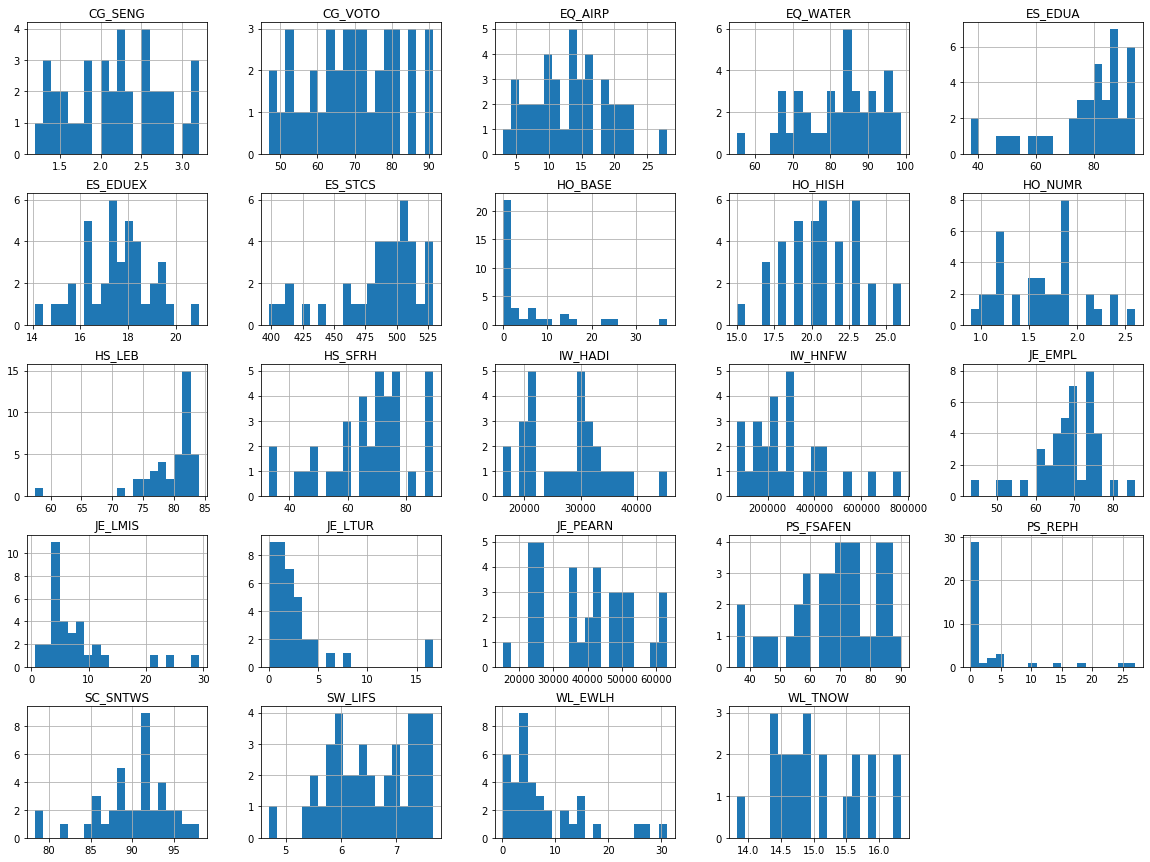

In [13]:
# %matplotlib inline # only in a Jupyter notebook 
# import matplotlib.pyplot as plt 
df_table.hist( bins = 20, figsize =( 20,15)) 
plt.show()

In [14]:
import statsmodels.formula.api as smf
results = smf.ols('SW_LIFS ~ IW_HNFW + JE_LMIS + JE_EMPL', data=df_table).fit()
print("Money: Net Wealth, Labor Market Insecurity, Employment rate")
print(results.summary())

Money: Net Wealth, Labor Market Insecurity, Employment rate
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     3.564
Date:                Mon, 20 Jan 2020   Prob (F-statistic):             0.0306
Time:                        13:48:06   Log-Likelihood:                -22.710
No. Observations:                  26   AIC:                             53.42
Df Residuals:                      22   BIC:                             58.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

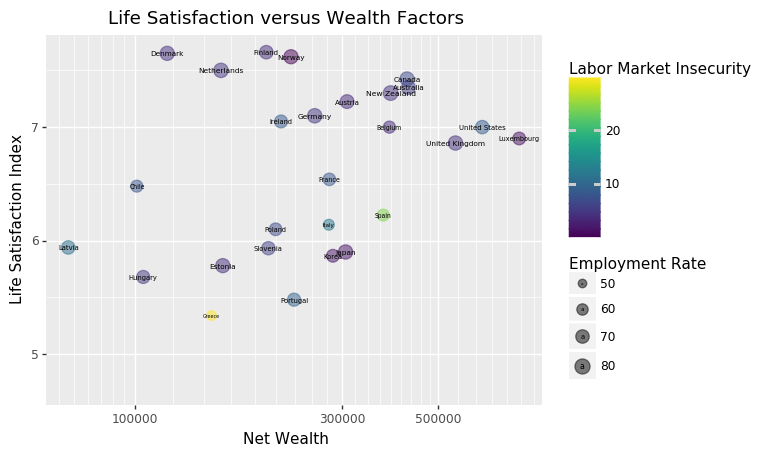

<ggplot: (109435470312)>

In [57]:
from plotnine import *
(ggplot(df_table, aes(x='IW_HNFW', y='SW_LIFS', color='JE_LMIS', size='JE_EMPL')) +
        geom_point(alpha=0.5) +
        scale_x_log10() +
        geom_text(aes(x='IW_HNFW', y='SW_LIFS', label='country'),
                  color="black",
                  data=df_table) +
        labs(title="Life Satisfaction versus Wealth Factors",x="Net Wealth",y="Life Satisfaction Index",size="Employment Rate",color="Labor Market Insecurity")
)

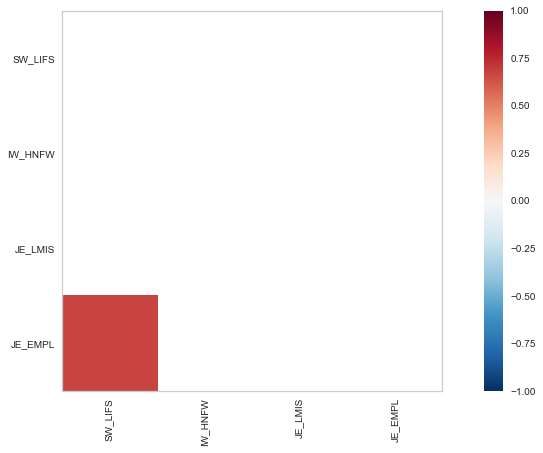

In [107]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'IW_HNFW', 'JE_LMIS', 'JE_EMPL']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()

In [32]:
results = smf.ols('SW_LIFS ~ EQ_AIRP + PS_REPH + EQ_WATER', data=df_table).fit()
print("Environment: Air pollution, Homicide rate, Water quality")
print(results.summary())

Environment: Air pollution, Homicide rate, Water quality
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     12.93
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.27e-06
Time:                        10:08:18   Log-Likelihood:                -31.352
No. Observations:                  41   AIC:                             70.70
Df Residuals:                      37   BIC:                             77.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

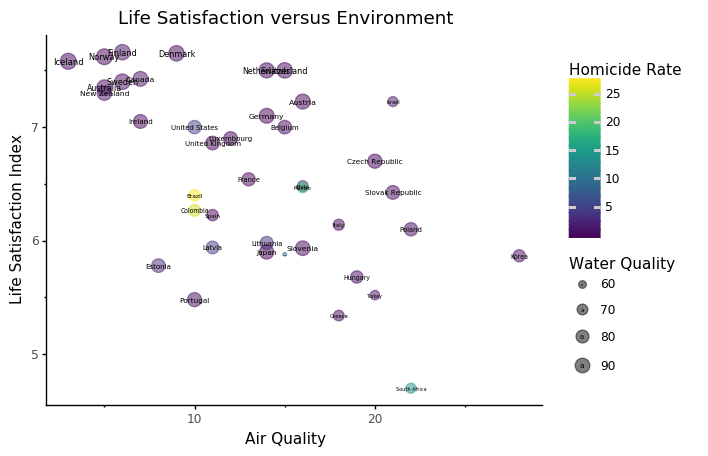

<ggplot: (109439547088)>

In [61]:
(ggplot(df_table, aes(x='EQ_AIRP', y='SW_LIFS', color='PS_REPH', size='EQ_WATER')) +
        geom_point(alpha = 0.5) +
         geom_text(aes(x='EQ_AIRP', y='SW_LIFS', label='country'),
                  color="black",
                  data=df_table) +
        theme_classic() +
        labs(title="Life Satisfaction versus Environment",x="Air Quality",y="Life Satisfaction Index",size="Water Quality",color="Homicide Rate")
)

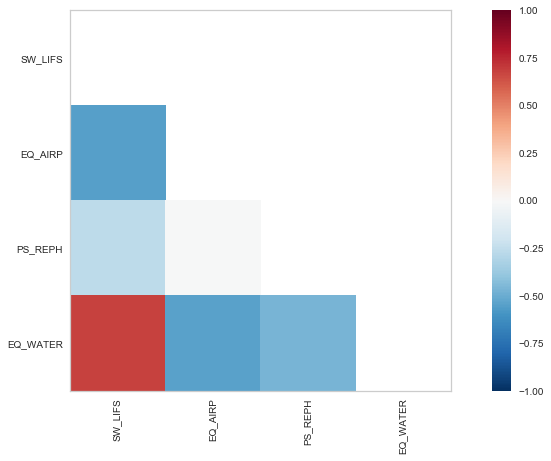

In [106]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'EQ_AIRP', 'PS_REPH', 'EQ_WATER']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()

In [33]:
results = smf.ols('SW_LIFS ~ HS_LEB + HS_SFRH + WL_EWLH', data=df_table).fit()
print("Health: Life expectancy, Self-reported health, Long work hours")
print(results.summary())

Health: Life expectancy, Self-reported health, Long work hours
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     10.05
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.12e-05
Time:                        10:09:48   Log-Likelihood:                -26.370
No. Observations:                  36   AIC:                             60.74
Df Residuals:                      32   BIC:                             67.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

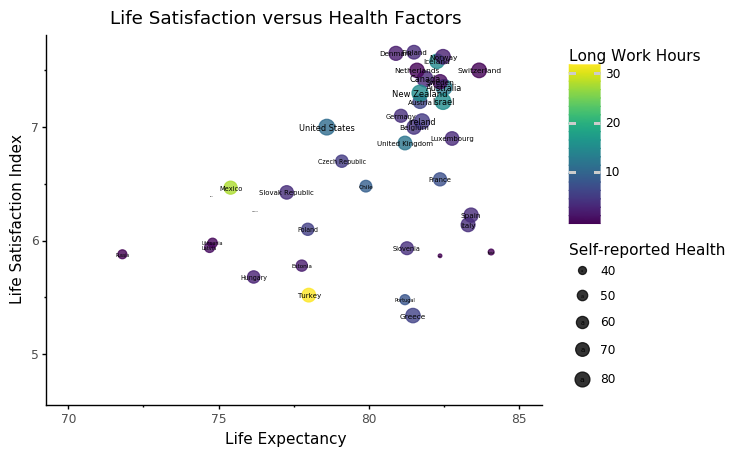

<ggplot: (109441255566)>

In [70]:
(ggplot(df_table[df_table['HS_LEB'] > 70], aes(x='HS_LEB', y='SW_LIFS', color='WL_EWLH', size='HS_SFRH')) +
        geom_point(alpha = 0.8) +
 scale_x_continuous(limits=[70,85]) +
        geom_text(aes(x='HS_LEB', y='SW_LIFS', label='country'),
                  color="black",
                  data=df_table) +
        theme_classic() +
        labs(title="Life Satisfaction versus Health Factors",x="Life Expectancy",y="Life Satisfaction Index",size="Self-reported Health",color="Long Work Hours")
)

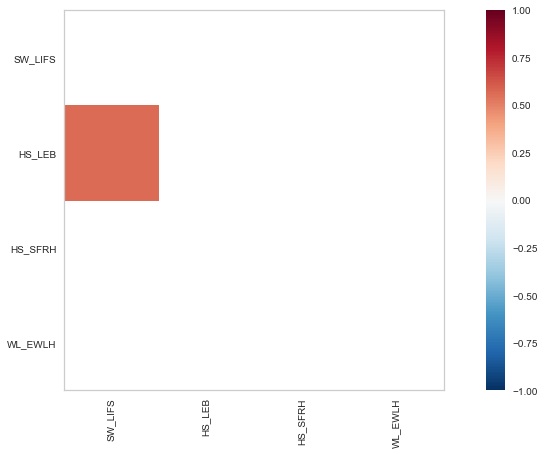

In [105]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'HS_LEB', 'HS_SFRH', 'WL_EWLH']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()